In [1]:
import os
import simulation
import pynbody
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from data_pd.dump_features import dump_features
from simulation.sfh_in_box import compute_binned_sfh, plot_binned_sfh, bin_sfh, plot_hist_sfh
import tqdm
import astropy.units as u
from simulation.units import *
from simulation.angmom import sideon, faceon
from simulation.derived import feh, mgfe

In [2]:
SIM_PATH = "/home/michele/sim/MySimulations/ng/mb.62002_pXX_a800_r600"
PERI_LIST = [50, 100, 150, 200, 300]

In [3]:
sims = list()
for peri in PERI_LIST:
    sim_path = os.path.join(SIM_PATH.replace('XX', str(peri)), 'out')
    sims.append(simulation.Simulation(sim_path, snap_indexes=slice(None, None, 10))) 

loading simulation: /home/michele/sim/MySimulations/ng/mb.62002_p50_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological parameters
Found trace file
Found dens_temp_trace file
loading simulation: /home/michele/sim/MySimulations/ng/mb.62002_p100_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological parameters
Found trace file
Found dens_temp_trace file
loading simulation: /home/michele/sim/MySimulations/ng/mb.62002_p150_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological parameters
Found trace file
Found dens_temp_trace file
loading simulation: /home/michele/sim/MySimulations/ng/mb.62002_p200_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological 

# Trajectories

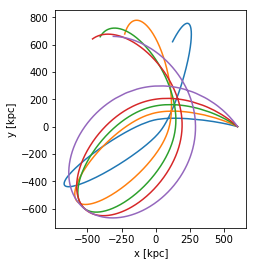

In [4]:
fig, ax = plt.subplots()
for sim in sims:
    ax.plot(sim.trace.x, sim.trace.y)
    ax.set_aspect('equal')
    ax.set_xlabel('x [kpc]')
    ax.set_ylabel('y [kpc]')

In [5]:
a = sims[0]

# SFH

{'h': 0.7,
 'omegaL0': 0.72,
 'omegaM0': 0.28,
 'time_begin': 8.203850001636201,
 'time_end': 13.679511319403739,
 'z_begin': 0.5648698243911743,
 'z_end': 0.0034266559206383995}


/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'a'=1.00e+00
  name, value), RuntimeWarning)


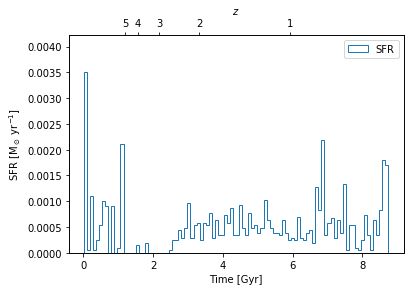

In [15]:
fig, ax = plt.subplots()
plot_sfh(a, ax_sfh=ax)

In [16]:
a.t_range

(8.203850001636201, 13.679511319403739)

In [8]:
cache_files = ['mb.62002_pXX_a800_r600.fits'.replace('XX', str(peri)) for peri in PERI_LIST]

In [9]:
tbl_list = list()
tbl_list = [Table.read(os.path.join('data_pd', f)) for f in cache_files]

FileNotFoundError: [Errno 2] No such file or directory: 'data_pd/mb.62002_p50_a800_r600.fits'

In [ ]:
moria_tbl = Table.read('moria62002.fits')

# FIXME

In [ ]:
fig, ax = plt.subplots()
bins_sfh = 50
moria_sim.plot_sfh(ax_sfh=ax)
for sim_idx in range(len(sims)):
    hist, binedges = bin_sfh(tbl_list[sim_idx]['t'], tbl_list[sim_idx]['sfr'], bins=bins_sfh)
    plot_hist_sfh(hist, binedges, ax=ax, label=sims[sim_idx].peri, linewidth=0.5)
ax.legend();
ax.set_xlim(8, 14)
ax_r = ax.twinx()
ax_r.plot(tbl_list[sim_idx]['t']tbl_list[sim_idx], '--')

/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'a'=1.00e+00
  name, value), RuntimeWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'a'=1.00e+00
  name, value), RuntimeWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'a'=1.00e+00
  name, value), RuntimeWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'a'=1.00e+00
  name, value), RuntimeWarning)


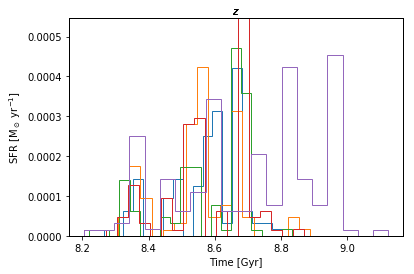

In [17]:
fig, ax = plt.subplots()
for sim in sims:
    sim.plot_sfh(ax_sfh=ax, trange=a.t_range, bins=20)

# Effective radius

In [ ]:
for sim in sims:
    sim.plot_sfh(ax_sfh=ax, trange=a.t_range, bins=20)